# Preprocess data

## import libraries
Before running this, please install pyMAGIQ using setup.py.
> python setup.py install

In [1]:
import numpy as np
import os
import csv 

# # these are for avoiding PROJ_LIB error
# # https://stackoverflow.com/questions/54201946/how-can-i-avoid-proj-lib-error-in-importing-basemap
# import conda
# conda_file_dir = conda.__file__
# conda_dir = conda_file_dir.split('lib')[0]
# proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
# os.environ["PROJ_LIB"] = proj_lib

import pyMAGIQ

/Users/nimamura/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/nimamura/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/nimamura/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/

## Specify data information
Raw files downloaded from:
- http://ds.iris.edu/spud/emtf

and saved training data in (datadir)/train, test data in (datadir)/test. Test data is used for the validation, so training and test data have to have rating information in xml file. Please save unrated data in (datadir)/unrated. Unrated data does not have rating information in xml file.

In [2]:
# frequency sets for USArray (Currently, this code works only with these frequencies)
freqsets = [  1.367187E-01, 1.093750E-01, 8.593753E-02, 6.640627E-02, 5.078124E-02, 3.906250E-02,
        3.027344E-02, 2.343750E-02, 1.855469E-02, 1.464844E-02, 1.171875E-02, 9.765625E-03,
        7.568361E-03, 5.859374E-03, 4.638671E-03, 3.662109E-03, 2.929688E-03, 2.441406E-03,
        1.892090E-03, 1.464844E-03, 1.159668E-03, 9.155271E-04, 7.324221E-04, 6.103516E-04,
        4.425049E-04, 3.204346E-04, 2.136230E-04, 1.373291E-04, 8.392331E-05, 5.340577E-05]

# number of frequency used in data
nfreq = len(freqsets)

datadir = '/Users/nimamura/work/pyMAGIQ/survey/USArray2020Jan_test'

traindir    = datadir + '/train'
X_trainpath = datadir + '/preprocessed/X_train.csv'
y_trainpath = datadir + '/preprocessed/y_train.csv'
rate_trainpath  = datadir + '/preprocessed/rate_train.csv'
SiteIDpath  = datadir + '/preprocessed/siteID_train.csv'
outputpath = datadir +'/outputs'

# list in training directory and test directory
trainlists = sorted( [f for f in os.listdir(traindir) if not f.startswith('.')] )

# number of lists
nMTtrain = len(trainlists)


## Read training data
* nrate : number of rating for impedance tensor
* ndata : number of data used for impecance tensor (Apparent resistivities, phases and those errorbar)
* ncomp : number of components used for impecance tensor (xy and yx)

In [3]:
nrate = 5
ndata = 4
ncomp = 2

# read X and y data from xml file
# read X_train and y_train
# X_train = np.zeros((nMTtrain,nfreq,ndata*ncomp*2),dtype=np.float32)    # Note that real value
# y_train = np.zeros((nMTtrain,),dtype=np.int)

# Make XML list from xml files
xml_train, SiteID_train = pyMAGIQ.utils.iofiles.io.get_XMLlists(nfreq,traindir,trainlists,freqsets)


MT_TF_USArray.ALW48.2015
reading Z.INVSIGCOV
MT_TF_USArray.ALW49.2015
reading Z.INVSIGCOV
MT_TF_USArray.ALX50.2015
reading Z.INVSIGCOV
MT_TF_USArray.ALY50.2015
reading Z.INVSIGCOV
MT_TF_USArray.ALZ51.2015
reading Z.INVSIGCOV
MT_TF_USArray.ARU43.2014
Use Hx orientation as a declination angle, instead of original declination
reading Z.INVSIGCOV
MT_TF_USArray.CAM01.2007
reading Z.INVSIGCOV
MT_TF_USArray.CAM02.2010
reading Z.INVSIGCOV
MT_TF_USArray.CAM03.2010
reading Z.INVSIGCOV
MT_TF_USArray.CAM04.2010
reading Z.INVSIGCOV
MT_TF_USArray.CAM05.2010
reading Z.INVSIGCOV
MT_TF_USArray.CAM06.2010
reading Z.INVSIGCOV
MT_TF_USArray.CAM94.2010
reading Z.INVSIGCOV
MT_TF_USArray.CAN01.2010
reading Z.INVSIGCOV
MT_TF_USArray.CAN02.2010
reading Z.INVSIGCOV
MT_TF_USArray.CAN03.2010
reading Z.INVSIGCOV
MT_TF_USArray.CAN03.2011
reading Z.INVSIGCOV
MT_TF_USArray.CAN04.2010
reading Z.INVSIGCOV
MT_TF_USArray.CAN05.2010
reading Z.INVSIGCOV
MT_TF_USArray.CAN06.2010
reading Z.INVSIGCOV
MT_TF_USArray.CAO01.2010


## data augmentation

In [4]:
# data augmentation
xml_train, SiteID_train = pyMAGIQ.utils.MAGIQlib.MAGIQlib.dataaug(xml_train, SiteID_train)


## convert xml_data to X and y

In [5]:
# read X (input data) and y (output data: rate) from XML files 
y_train, rate_train, Zapplist, Zapp_errlist, Zphslist, Zphs_errlist = pyMAGIQ.utils.MAGIQlib.MAGIQlib.xml2Z(xml_train,SiteID_train,nfreq,Rotate=True,freq_interp=freqsets)

X_train = pyMAGIQ.utils.MAGIQlib.MAGIQlib.getXfromZ(Zapplist, Zapp_errlist, Zphslist, Zphs_errlist, nfreq, SiteID_train)

# reshape X_train to 2-D array
X_train = X_train.reshape(len(X_train),nfreq*ndata*ncomp*2).astype('float32')

# X (input data) and y (output data: rate) is preprocessed here
# X_train, y_train, rate_train, SiteID_train, xml_train = pyMAGIQ.utils.MAGIQlib.MAGIQlib.getXYdataset(X_train,y_train,nfreq,traindir,trainlists,freqsets)

# change shape to fit it to machine learning
# X_train = X_train.reshape(len(X_train),nfreq*ndata*ncomp*2).astype('float32')


## data ordering

In [6]:
# numofordering=389
numofordering=550
# numofordering=650
X_train_aug = np.zeros((numofordering*5,nfreq*ndata*ncomp*2),dtype=np.float32)
y_train_aug = np.zeros((numofordering*5,),dtype=int)
SiteID_train_aug = []

for irate in range(nrate):
    # index of array having its rate as irate
    itemindex = np.squeeze(np.where(y_train==irate))
    
    # X and y array with irate
    X_irate = X_train[itemindex,:]
    y_irate = y_train[itemindex]
    # SiteID with irate
    SiteID_irate = []
    for j in range(len(itemindex)):
        ii = itemindex[j]
        SiteID_irate.append(SiteID_train[ii])

    # extract numofordering of lines
    idx = np.random.randint(len(y_irate),size=numofordering)
    
    X_irate = X_irate[idx,:]
    y_irate = y_irate[idx]
    SiteID_irate_copy = []
    for j in range(len(idx)):
        ii = idx[j]
        SiteID_irate_copy.append(SiteID_irate[ii])
        
    X_train_aug[irate*numofordering:(irate+1)*numofordering,:] = X_irate
    y_train_aug[irate*numofordering:(irate+1)*numofordering,] = y_irate
    SiteID_train_aug.extend(SiteID_irate_copy.copy())
    
rate_train_aug = y_train_aug + 1


## Save data augumentation 

In [7]:
X_trainpath_aug = datadir + '/preprocessed/X_train_aug.csv'
y_trainpath_aug = datadir + '/preprocessed/y_train_aug.csv'
rate_trainpath_aug  = datadir + '/preprocessed/rate_train_aug.csv'
SiteIDpath_aug  = datadir + '/preprocessed/siteID_train_aug.csv'

# save X and y data in csv format. 
np.savetxt( X_trainpath_aug, X_train_aug, delimiter=',')
np.savetxt( y_trainpath_aug, y_train_aug, fmt='%d', delimiter=',')
np.savetxt( rate_trainpath_aug, rate_train_aug, fmt='%d', delimiter=',')

with open(SiteIDpath_aug,'w') as output:
    writer = csv.writer(output, lineterminator='\n')
    for val in SiteID_train_aug:
        writer.writerow([val])

## Save training data

In [8]:

# save X and y data in csv format. 
np.savetxt( X_trainpath, X_train, delimiter=',')
np.savetxt( y_trainpath, y_train, fmt='%d', delimiter=',')
np.savetxt( rate_trainpath, rate_train, fmt='%d', delimiter=',')

with open(SiteIDpath,'w') as output:
    writer = csv.writer(output, lineterminator='\n')
    for val in SiteID_train:
        writer.writerow([val])


## histogram of rate

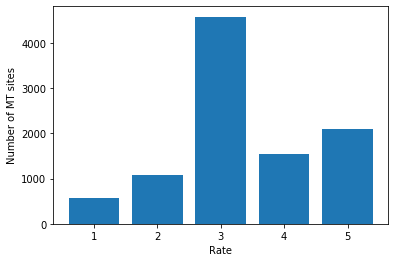

In [9]:
pyMAGIQ.utils.MAGIQlib.MAGIQlib.ratehistogram1d(rate_train,fname=outputpath+'/rate_hist.eps')

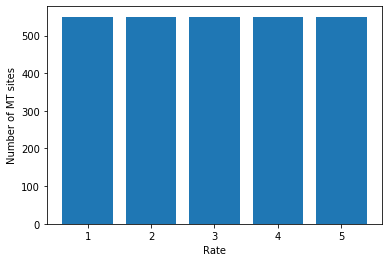

In [10]:
pyMAGIQ.utils.MAGIQlib.MAGIQlib.ratehistogram1d(rate_train_aug,fname=outputpath+'/rate_hist_aug.eps')

## Plot rated Map US

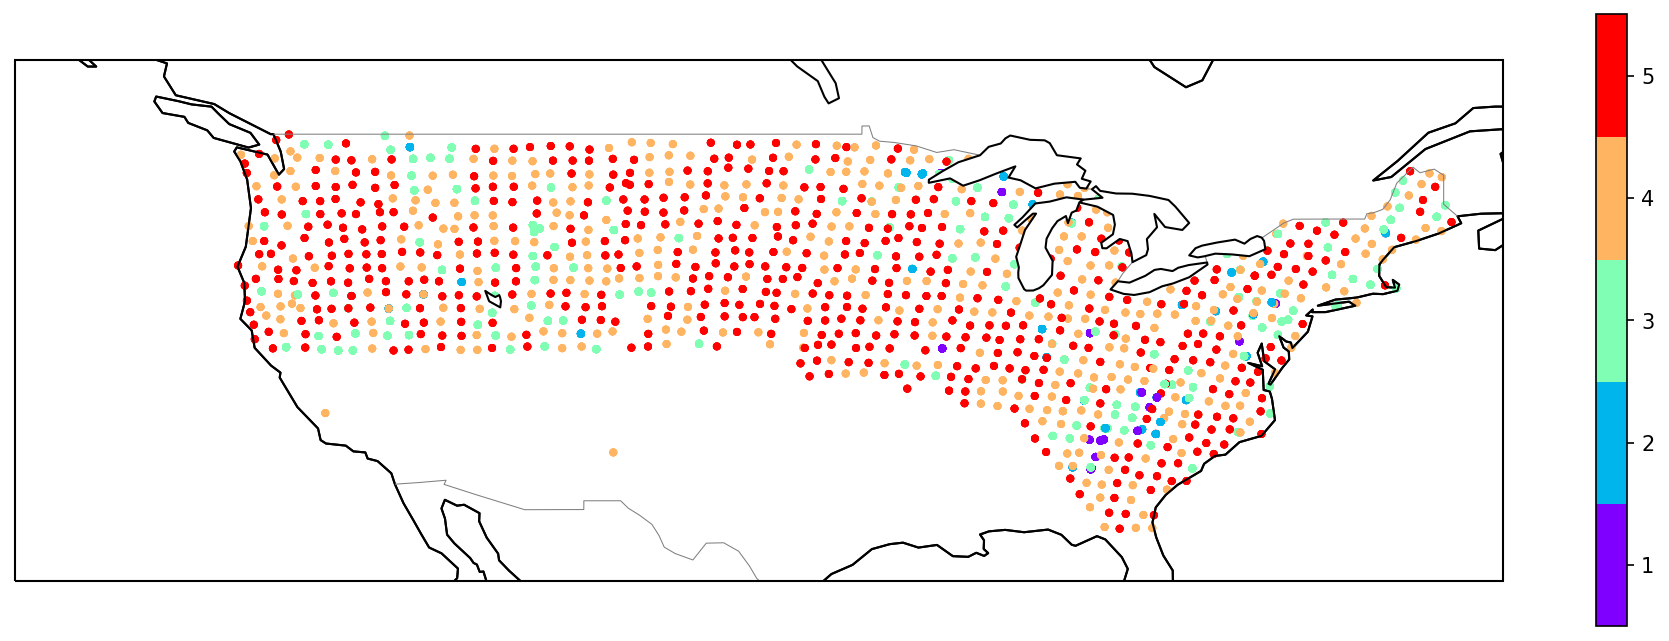

In [11]:
target='train'

xmin = -135
xmax = -65.0
ymin = 28.0
ymax = 47.0

latlist = []
lonlist = []

# read rate
ratelist = pyMAGIQ.utils.iofiles.io.read_rate_ytrain(y_trainpath)

# read site ID
siteIDlist = pyMAGIQ.utils.iofiles.io.read_siteID(SiteIDpath)

for i in range(len(xml_train)):
    latlist.append(xml_train[i]['lat'])
    lonlist.append(xml_train[i]['lon'])

# latlist,lonlist = read_lonlat(datadir,siteIDlist,target)
fpath = outputpath+'/imageUS.eps'
pyMAGIQ.vis.plotUSmap.plotMap(datadir,xmin,xmax,ymin,ymax,latlist,lonlist,ratelist,fpath)


## Set unrated data information

In [12]:
unrateddir       = datadir + '/unrated'
X_unratedpath    = datadir + '/preprocessed/X_unrated.csv'
SiteIDpath_unrated = datadir + '/preprocessed/siteID_unrated.csv'

unratedlists = sorted( [f for f in os.listdir(unrateddir) if not f.startswith('.')] )

nMTunrated  = len(unratedlists)


## read unrated data (XML files)

In [14]:
# read X_unrated from XML files
xml_unrated, SiteID_unrated = pyMAGIQ.utils.iofiles.io.get_XMLlists(nfreq,unrateddir,unratedlists,freqsets,unrated=True)

# read X (input data) and y (output data: rate) from XML files 
Zapplist, Zapp_errlist, Zphslist, Zphs_errlist = pyMAGIQ.utils.MAGIQlib.MAGIQlib.xml2Z(xml_unrated,SiteID_unrated,nfreq,Rotate=True,freq_interp=freqsets,unrated=True)

X_unrated = pyMAGIQ.utils.MAGIQlib.MAGIQlib.getXfromZ(Zapplist, Zapp_errlist, Zphslist, Zphs_errlist, nfreq, SiteID_train)

# reshape X_train to 2-D array
X_unrated = X_unrated.reshape(len(X_unrated),nfreq*ndata*ncomp*2).astype('float32')



MT_TF_CAFE-MT.CAF02.2010
Use Hx orientation as a declination angle, instead of original declination
reading Z.INVSIGCOV
MT_TF_CAFE-MT.CAF04.2010
Use Hx orientation as a declination angle, instead of original declination
reading Z.INVSIGCOV
MT_TF_CAFE-MT.CAF06.2010
Use Hx orientation as a declination angle, instead of original declination
reading Z.INVSIGCOV
MT_TF_CAFE-MT.CAF09.2010
Use Hx orientation as a declination angle, instead of original declination
reading Z.INVSIGCOV
MT_TF_CAFE-MT.CAF11.2010
Use Hx orientation as a declination angle, instead of original declination
reading Z.INVSIGCOV
MT_TF_CAFE-MT.CAF13.2010
Use Hx orientation as a declination angle, instead of original declination
reading Z.INVSIGCOV
skip it! IndexError when reading XML file  MT_TF_CAFE-MT.CAF13.2010
MT_TF_CAFE-MT.CAF15.2010
Use Hx orientation as a declination angle, instead of original declination
reading Z.INVSIGCOV
MT_TF_CAFE-MT.CAF18.2010
Use Hx orientation as a declination angle, instead of original decl

In [15]:
# # # read X_unrated
# # X_unrated = np.zeros((nMTunrated,nfreq,ndata*ncomp*2),dtype=np.float32)    # Note that real value
# # X_unrated,SiteID_unrated, xml_unrated = pyMAGIQ.utils.MAGIQlib.MAGIQlib.getX_unrated(X_unrated,nfreq,unrateddir,unratedlists,freqsets)

# # # convert shape
# # X_unrated = X_unrated.reshape(len(X_unrated),nfreq*ndata*ncomp*2).astype('float32')

# # set y_vote for voting
# # y_vote = np.zeros( (len(X_unrated),nrate), dtype=np.float )

# # save X and y data in csv format. You don't have to read EDI files again
# np.savetxt( X_unratedpath,  X_unrated, delimiter=',')
# with open(SiteIDpath_unrated,'w') as output:
#     writer = csv.writer(output, lineterminator='\n')
#     for val in SiteID_unrated:
#         writer.writerow([val])

## save unrated data

In [16]:

# save X and y data in csv format. 
np.savetxt( X_unratedpath, X_unrated, delimiter=',')

with open(SiteIDpath_unrated,'w') as output:
    writer = csv.writer(output, lineterminator='\n')
    for val in SiteID_unrated:
        writer.writerow([val])

# save xml_unrated dict with pickle
try:
    import cPickle as pickle
except ImportError:  # python 3.x
    import pickle
    
with open(outputpath+'/xml_unrated.p', 'wb') as fp:
    pickle.dump(xml_unrated, fp, protocol=pickle.HIGHEST_PROTOCOL)